In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
results = pd.read_csv('results/_sgd/activation_norms.csv')

In [25]:
init = results[results["step"]==1]
mean_activation_norms = pd.DataFrame(init.groupby('width_multiplier')['ssm_state_0'].mean())
def log_normal_func(x, a, mu, sigma, offset):
    # Add epsilon to x to avoid log(0) errors if x starts at 0
    return a * np.exp(-(np.log(x + 1e-6) - mu)**2 / (2 * sigma**2)) + offset

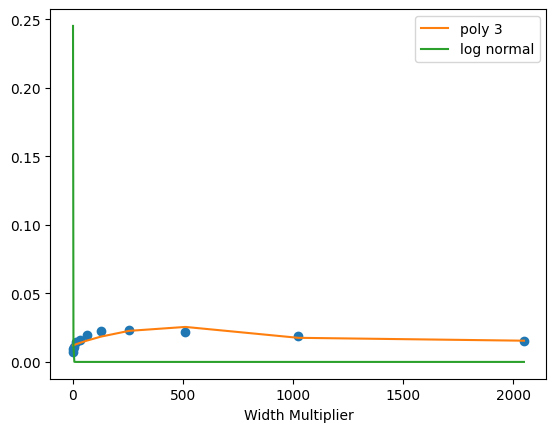

In [ ]:
from scipy.stats import lognorm
mu = 0.2
sigma = 0.5
offset = 0.0
log_normal_guess = lognorm.pdf(mean_activation_norms.index, s=sigma, scale=np.exp(mu), loc=offset)

coefficients = np.polyfit(mean_activation_norms.index, mean_activation_norms['ssm_state_0'], 3)
plt.plot(mean_activation_norms.index, mean_activation_norms['ssm_state_0'], 'o')
plt.plot(mean_activation_norms.index, np.polyval(coefficients, mean_activation_norms.index), label='poly 3')
# plt.plot(mean_activation_norms.index, log_normal_guess, label='log normal')
plt.xlabel('Width Multiplier')
plt.legend()

array([1.90297805e-01, 9.25649646e-02, 2.78484743e-02, 5.18200804e-03,
       5.96398669e-04, 4.24538572e-05, 1.86913019e-06, 5.08983679e-08,
       8.57255082e-10, 8.93013834e-12, 5.75371324e-14])